https://github.com/skiehl/wwz
we refer to this code and add the normalized WWZ.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib.colors import LogNorm
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from wwz import WWZ
from wwzplotter import WWZPlotter

In [3]:
plt.rcParams.update({
    'figure.figsize': (16, 4),
    'lines.linestyle': 'None',
    'lines.marker': 'o',
    'lines.markersize': 4,
    })

cmap = cm.get_cmap('jet')

C:\Users\11691\AppData\Local\Temp\ipykernel_10140\2932516681.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')


Data total time: 58511.2


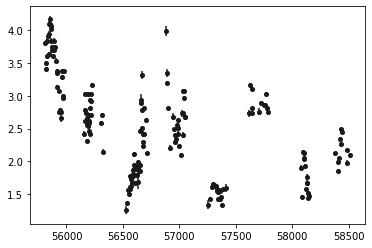

In [4]:
file=np.loadtxt('F_Opt_J0303-2407.txt')
t = file[:,0]
x = file[:,1]
x_err = file[:,2]
plt.errorbar(t, x, yerr=x_err, zorder=0, color='0.1')

print('Data total time: {0:.1f}'.format(t[-1]))

In [27]:
filepath='E:\Astronomy\wwz\\0303-2407\simu'
file1=np.loadtxt('F_Opt_J0303-2407.txt')
t1 = file1[:,0]
x1 = file1[:,1]
x_err1 = file1[:,2]
line=len(file1)
list1=[]
def ff(n):
    xx=os.listdir(filepath)
    
    file=np.loadtxt(filepath+'/'+xx[n])
    t2 = file[:,0]
    x2 = file[:,1]
    x_err2 = file[:,2] 
    list1=[]
    for k in range(line):
        c=t1[k]-t2
        d=np.where(abs(c) <= 1)
        t3=t2[d]
        x3=x2[d]
        x_err3=x_err2[d]
        for m in range(0,len(t3)):
            global t4,x4,x_err4
            t4=t3[m]
            x4=x3[m]
            x_err4=x_err3[m]
        a=(t4,x4,x_err4)
        list1.append(a)
    aa=np.array(list1)
    t=aa[:,0]
    x=aa[:,1]
    x_err=aa[:,2]
    #type(t)
    return t, x, x_err


In [28]:
import os
simulations = [ff(n) for n in range(2000)]
print('{0:d} simulations created.'.format(len(simulations)))
#type(simulations)


2000 simulations created.


In [29]:
print(len(ff(0)[0]))

180


In [30]:
print(len(simulations[0][0]))
np.set_printoptions(threshold=np.inf)

180


Show randomly picked example of the Gaussian white noise simulations:

107


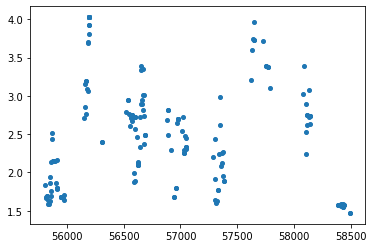

In [31]:

i = np.random.randint(len(simulations))
print(i)
plt.errorbar(simulations[i][0], simulations[i][1], yerr=0.01)
pass

For the demonstration of the significance analysis we reset the `WWZ` instance and set it up with fewer time bins. This will reduce the computing time.

In [32]:
wwz = WWZ(t, x, x_err)
freq = wwz.get_freq(p_min=200, p_max=2500)
tau = wwz.get_tau(n_bins=200)
wwz.set_freq(freq, verbose=0)
wwz.set_tau(tau, verbose=0)

wwz.transform(verbose=1)
pass

WWZ instance created.
Data stored.
p_max  should not be larger than 540.0.

Linear range of frequencies created with
Shortest period:         2.00e+02
Longest period:          2.50e+03
Period interval:       non-linear
Lowest frequency:        4.00e-04
Highest frequency:       5.00e-03
Frequency interval:      4.65e-05
Number of frequencies:        100

Linear range of tau (time points) created with
Earliest time:            55813.5
Latest time:              58511.2
Time interval:               13.6
Points in time:               200

Starting the WWZ transform..
Finished in 0:00:00.317614


### Analyse simulations

To run the significance estimation we hand the list of simulations to the `estimate_significance()` method. The list of simulations needs to be set up as follows. Each item in the list is one simulation. `estimate_significance()` iterates over that list. Each simulation has to be stored in a list or tuple of two or three entries. The first provides the time, the second provides the fluxes, the third provides the uncertainties. The third is optional.

In [33]:
wwz.estimate_significance(simulations)
pass

WWZ instance created.
Starting analysis of simulations at 2024-04-28 01:29:15.320099
Progress: 16 of 2000. 0.8%

KeyboardInterrupt: 

The images are showing identical information. Only the scaling is different, as can be seen in the colorbars. The p-values are normalized to the interval [0,1] and as such are more usefull than the total counts. Therefore, in the following we will only look at the p-values.

It is possible to check how many simulations have been analyses in total:

Below, we quickly look at the p-value maps for WWZ and WWA:

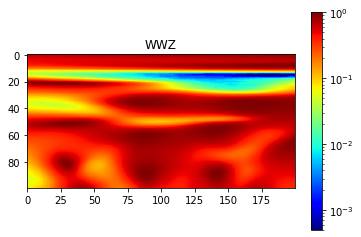

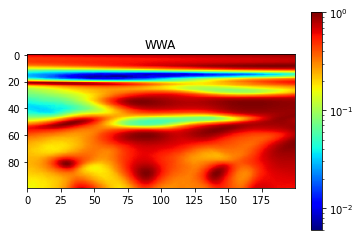

In [ ]:
img = plt.imshow(result_wwz_pval, cmap=cmap, norm=LogNorm())
plt.colorbar(img)
plt.title('WWZ')
plt.figure()
import csv
with open('some1.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(result_wwz_pval)

pass

Finding peaks in WWZ.
Threshold set to: 119.96703716599714
Analysis in frequency space.
Done.


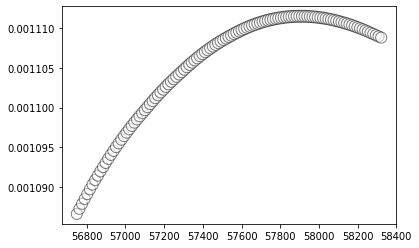

In [ ]:
quantile = 0.99
peak_tau, peak_pos, peak_signal = wwz.find_peaks('wwz', quantile)

plt.scatter(peak_tau, peak_pos, s=peak_signal, color='w', edgecolor='k', alpha=0.5)
pass

## Plotting the WWZ and WWA

In [34]:
file=np.loadtxt('F_Opt_J0303-2407.txt')
t = file[:,0]
x = file[:,1]
x_err = file[:,2]

WWZ instance created.
Data stored.
p_max  should not be larger than 1349.0.

Linear range of frequencies created with
Shortest period:         1.00e+02
Longest period:          2.40e+03
Period interval:         2.32e+01
Lowest frequency:        4.17e-04
Highest frequency:       1.00e-02
Frequency interval:    non-linear
Number of frequencies:        100

Linear range of tau (time points) created with
Earliest time:            55813.5
Latest time:              58511.2
Time interval:                8.0
Points in time:               337

Frequencies set.
Tau (time points) set.
Starting the WWZ transform..


Finished in 0:00:00.502760
Finding peaks in WWZ.
Threshold set to: 128.35754776448258
Analysis in period space.
Done.


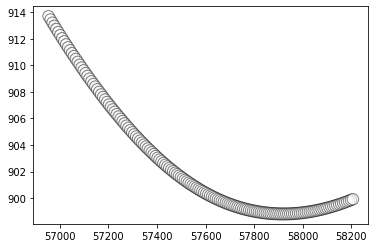

In [246]:
linear_period = True

wwz = WWZ(t, x, x_err)
freq = wwz.get_freq(p_max_factor=1, linear_period=linear_period,p_min=100,p_max=2500)
tau = wwz.get_tau()
wwz.set_freq(freq)
wwz.set_tau(tau)

wwz.transform(verbose=1)
result_wwz = wwz.wwz.transpose()

Finding peaks in WWZ.
Threshold set to: 128.35754776448258
Analysis in period space.
Done.


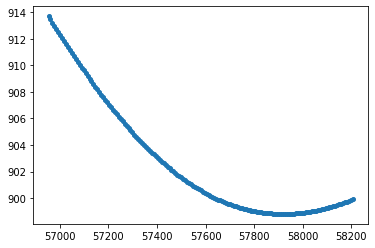

In [247]:
quantile = 0.99
peak_tau, peak_pos, peak_signal = wwz.find_peaks('wwz', quantile)

#plt.scatter(peak_tau, peak_pos, s=peak_signal, color='w', edgecolor='k', alpha=0.5)
pass
file = open('sig0.989.txt', "w")
combined = zip(peak_tau, peak_pos, peak_signal)
for data in combined:
    file.write(f"{data[0]} {data[1]} {data[2]}\n")
file.close()

sig=np.loadtxt('sig0.989.txt')
a=sig[:,0]
b=sig[:,1]
c=sig[:,2]
plt.plot(a,b)

Create a `WWZPlotter` instance. Provide the `WWZ` instance that should be plotted as argument. Optionally, we also provide the time unit, which will be automatically used in all axis labels.

In [250]:
plotter = WWZPlotter(wwz, tunit='days')

Plot the WWZ map in the main panel. An average along the time axis is shown on the right side. The data is plotted in the lower panel.

e:\Astronomy\wwz\0303-2407\wwzplotter.py:369: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax.plot(aa, mag_model, '-k', lw=2,color='b')


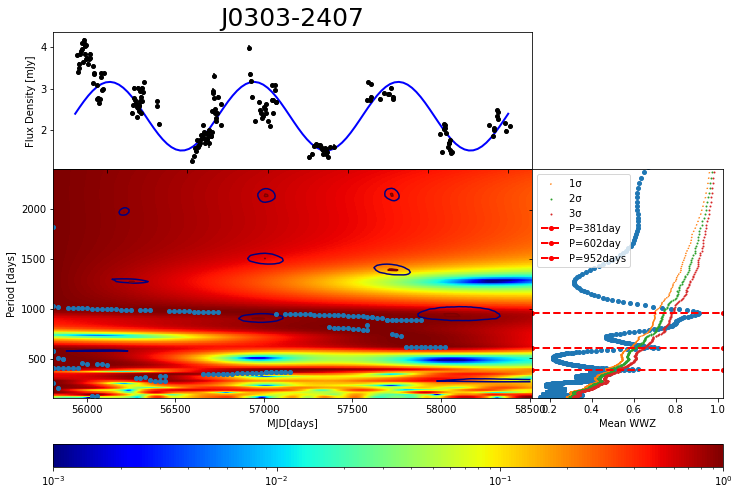

In [252]:
plotter.plot(
        'wwz', statistic='mean', figsize=(12, 8), xlabel=None, ylabel='Flux Density [mJy]',
        kwargs_map={'norm': LogNorm(), 'cmap': cmap}, kwargs_map_avg={'color': 'k'}, kwargs_data={'color': 'k'})
pass